<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/main/task1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
%matplotlib inline
##plots be directly displayed below the code

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data from the text file
var = pd.read_csv('/content/task1data.csv', usecols=["mean_precipitation", "mean_temperature"])
var

,mean_precipitation,mean_temperature
0,0.007764,281.411267
1,0.004098,282.410664
2,0.002874,283.448012
3,0.004353,284.263515
4,0.001631,287.843154
5,0.000045,294.836135
6,0.000002,296.427540
7,0.000040,294.899524
8,0.000033,295.229650
9,0.003485,290.409421


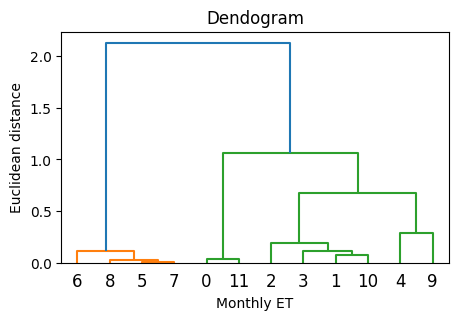

In [164]:
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(5,3))
# Scaling the variables have large diff.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(var)

## to find the optimum cluster
dendogram = sch.dendrogram(sch.linkage(scaled_data, method ="ward"))
plt.title("Dendogram")
plt.xlabel("Monthly ET")
plt.ylabel("Euclidean distance")
plt.show()
##scaled_data
##var

In [170]:
from scipy.spatial.distance import euclidean
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cl = cluster.fit_predict(scaled_data)
##cl


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 1, 1, 1, 0, 3, 3, 3, 3, 0, 1, 2])

In [171]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data,cl)

0.7431702624364295

In [185]:
# Get the unique cluster labels
unique_cl = np.unique(cl)

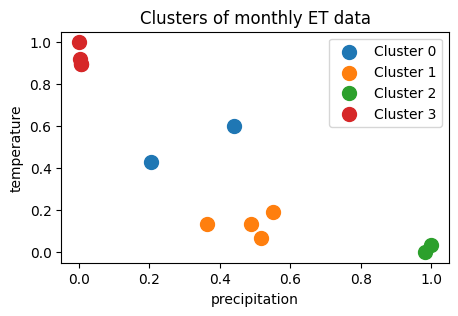

In [186]:
# Plot each cluster
plt.figure(figsize=(5, 3))
for label in unique_cl:
    plt.scatter(scaled_data[cl == label, 0], scaled_data[cl == label, 1], s=100, label=f'Cluster {label}')

plt.xlabel("precipitation")
plt.ylabel("temperature")
plt.title("Clusters of monthly ET data")
plt.legend()
plt.show()

In [174]:
##tryDSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(scaled_data)
dist, indices = nbrs.kneighbors(scaled_data)

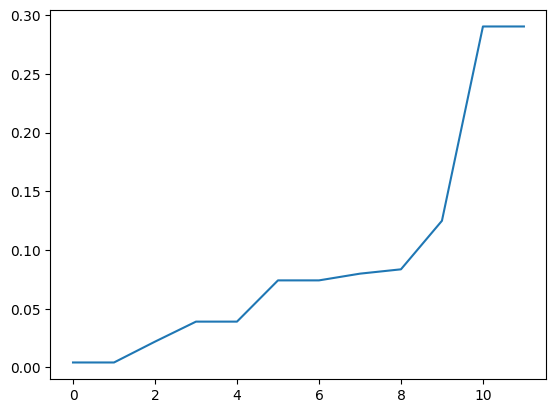

In [175]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist)

In [151]:
from sklearn.cluster import DBSCAN
dbscancluster =DBSCAN(eps=0.3, min_samples=2)
dbscancluster.fit(scaled_data)
cluster = dbscancluster.labels_
##cluster

array([0, 1, 1, 1, 2, 3, 3, 3, 3, 2, 1, 0])

In [152]:
silhouette_score(scaled_data, cluster)

0.7431702624364295